In [3]:
#using a tree-based feature reduction algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

DATAPATH='/Users/anca/Downloads/Hack-H-er413-master 2/model/full_random_sample.csv'
df=pd.read_csv(DATAPATH)
useful_columns=['hospital_death','age', 'bun_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'temp_apache', 'ventilated_apache', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min',
       'd1_spo2_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min',
       'h1_resprate_max', 'h1_sysbp_min', 'd1_bun_min',
       'apache_4a_icu_death_prob']
df=df[useful_columns]
df_majority=df[df['hospital_death']==0]
df_minority=df[df['hospital_death']==1]

df_majority_downsampled = df_majority.sample(replace=False,    # sample without replacement
                                             n=df_minority.shape[0],
                                             random_state=0)     # to match minority class    #reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
working_df=df_downsampled


In [4]:
y=working_df.pop('hospital_death')
length_partial=working_df.shape[0]
#working_df.pop('apache_4a_hospital_death_prob')
#working_df.pop('apache_4a_icu_death_prob')
#doctor_pred_partial=working_df.pop('apache_4a_icu_death_prob')
#doctor_pred_partial=(doctor_pred_partial>0.5)*np.ones(length_partial)
X=working_df
#y=y.to_numpy()
#X=X.to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#y_doctor_test_balanced=doctor_pred_partial.sample(replace=False, n=3000, random_state=0)
#y_doctor_pred_balanced=y.sample(replace=False, n=3000, random_state=0)

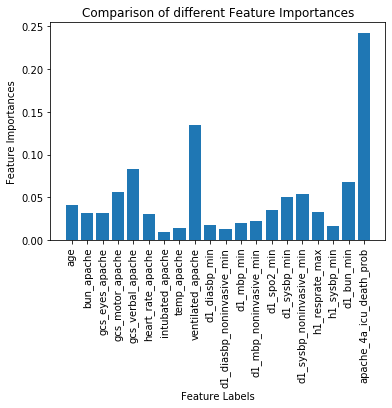

Index(['age', 'gcs_motor_apache', 'gcs_verbal_apache', 'ventilated_apache',
       'd1_spo2_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min',
       'h1_resprate_max', 'd1_bun_min', 'apache_4a_icu_death_prob'],
      dtype='object')
Index(['age', 'bun_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'temp_apache', 'ventilated_apache', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min',
       'd1_spo2_min', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min',
       'h1_resprate_max', 'h1_sysbp_min', 'd1_bun_min',
       'apache_4a_icu_death_prob'],
      dtype='object')


In [5]:
#df=df.to_numpy()
#need to insert dataset below
#X=X.to_numpy()
#y=y.to_numpy()
#X.shape

#GET IMPORTANT FEATURES
#clf=classifier :))#

clf = ExtraTreesClassifier(n_estimators=50, min_samples_leaf=10, max_features=20)
#n_estimtors = number of trees in forest
#min_samples_split= minumum number before node splitting in tree, maybe 5
#min_samples_leaf
#max_features
clf = clf.fit(X_train, y_train)

clf.feature_importances_ 

#print(clf.feature_importances_ )
copy_importances=np.sort(clf.feature_importances_)
copy_importances=np.flip(copy_importances)
#print(copy_importances)
#Get the 10th and 20th most important features
no_10=copy_importances[9]
no_20=copy_importances[19]
first_10=clf.feature_importances_[clf.feature_importances_>=no_10]
relevant_columns_10=X.columns[clf.feature_importances_>=no_10]

first_20=clf.feature_importances_[clf.feature_importances_>=no_20]
relevant_columns_20=X.columns[clf.feature_importances_>=no_20]

#print(sum(first_20))~ first 20 amount to 74% of cumulative Gini importance
#Plot importance scores
#plt.bar(X.columns, clf.feature_importances_ ) 
#plt.xlabel('Feature Labels') 
#plt.ylabel('Feature Importances') 
#plt.xticks(rotation='vertical')
#plt.title('Comparison of different Feature Importances') 
#plt.show() 
plt.bar(relevant_columns_20, first_20 ) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.xticks(rotation='vertical')
plt.title('Comparison of different Feature Importances') 
plt.show() 
print(relevant_columns_10)
print(relevant_columns_20)

In [7]:
#Test models (us and doctor) on EVEN data (balanced classes)
model = SelectFromModel(clf, prefit=True)

y_pred=clf.predict(X_test)
#print(y_pred)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Accuracy doctor balanced:",metrics.accuracy_score(y_doctor_test_balanced, y_doctor_pred_balanced))
#from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix
#binary1 = confusion_matrix(y_test, y_pred)
#binary2 = confusion_matrix(y_doctor_test_balanced, y_doctor_pred_balanced)
#fig, ax = plot_confusion_matrix(conf_mat=binary1)
#plt.show()
#fig, ax = plot_confusion_matrix(conf_mat=binary2)
#plt.show()
#print(df.head())
y=df.pop('hospital_death')

Accuracy: 0.7912192040429564


In [10]:
#Test model on all data
#print(df.head())
#y=df.pop('hospital_death')
#df.pop('apache_4a_hospital_death_prob')
#doctor_pred=df.pop('apache_4a_icu_death_prob')

#getting predictions for doctors, if doctors predicted with threshold 0.5
#length=df.shape[0]
#ones=np.ones(length)
#doctor_pred=ones*(doctor_pred>0.5)
X=df
#print('y length=',y.shape[0])
#print('X length=',X.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred=clf.predict(X_test)

#getting doctor predictions
#y_doctor_pred=doctor_pred.sample(replace=False, n=18000, random_state=0)
#y_test_doctor=y.sample(replace=False, n=18000,random_state=0)
#print(y_pred)
#print(y_test_doctor)
#print(y_doctor_pred)


from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Accuracy_doctor:",metrics.accuracy_score(y_test_doctor, y_doctor_pred))

Accuracy: 0.8071743989532791


[[13384  3288]
 [  249  1422]]


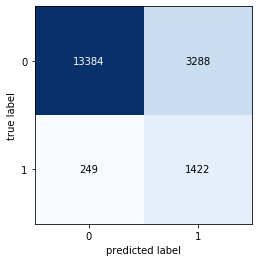

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from mlxtend.plotting import plot_confusion_matrix
binary1 = confusion_matrix(y_test, y_pred)
#binary2 = confusion_matrix(y_test_doctor, y_doctor_pred)
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()
#fig, ax = plot_confusion_matrix(conf_mat=binary2)
#plt.show()

In [13]:
#PREDICTIONS: DEATH or LIVE
#or PROBABILITY of DEATH
#X_test takes in the 20 columns I gave you

y_pred=clf.predict(X_test)
y_death_probability_prediction=clf.predict_proba(X_test)
print(y_pred)
print(y_death_probability_prediction)


[1 1 1 ... 0 1 0]
[[0.08411088 0.91588912]
 [0.01333981 0.98666019]
 [0.21104083 0.78895917]
 ...
 [0.5721527  0.4278473 ]
 [0.03865951 0.96134049]
 [0.96048675 0.03951325]]


In [17]:
import pickle

pkl_filename = "pickle_model_20.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
#score = pickle_model.score(X_test, y_test)
#print("Test score: {0:.2f} %".format(100 * score))
#Ypredict = pickle_model.predict(X_test)